In [2]:
# My first Excercise on Haberman Cancer Dataset
# import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset sourced from Kaggle 
URL - https://www.kaggle.com/gilsousa/habermans-survival-data-set

In [3]:
# Read dataset
haberman = pd.read_csv('haberman.csv')

In [15]:
print ("Dataset Shape = ", haberman.shape)
# Shape Denotes that there its a 305*4 matirx. 305 Rows and 4 Columns
print (haberman.head())

Dataset Shape =  (305, 4)
   Age  Year_of_Operation  Axillary_Nodes  Survival_Status
0   30                 62               3                1
1   30                 65               0                1
2   31                 59               2                1
3   31                 65               4                1
4   33                 58              10                1


In [14]:
# Assiging Column names for better understanding of data (as per kaggle labels)
haberman.columns = ["Age", "Year_of_Operation", "Axillary_Nodes", "Survival_Status"]
print (haberman.head())
print (haberman.columns) # haberman.info() can also be used to get information
haberman.dtypes

   Age  Year_of_Operation  Axillary_Nodes  Survival_Status
0   30                 62               3                1
1   30                 65               0                1
2   31                 59               2                1
3   31                 65               4                1
4   33                 58              10                1
Index(['Age', 'Year_of_Operation', 'Axillary_Nodes', 'Survival_Status'], dtype='object')


Age                  int64
Year_of_Operation    int64
Axillary_Nodes       int64
Survival_Status      int64
dtype: object

In [13]:
# Check if any null values, (if found then apply imputing mechanism)
haberman.isnull().values.any()

False

In [16]:
# get the count of Output class (Survival_Status) to analyse data symmetry
haberman["Survival_Status"].value_counts()

1    224
2     81
Name: Survival_Status, dtype: int64

There are 224 patients with class_1 (Survived) and 81 patients with class_2 (unsurvived)
This is an imbalanced dataset. (There are techniques like upsampling the class with lower dataset)

Objective: The main objective objective of this case study is to predict whether a patient will survive after 5 years or not based on the given data (age, year_of_operation & axillary_nodes)

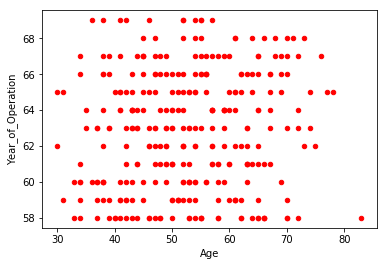

In [22]:
#### 2-D Scatter Plot b/w Age and Year
haberman.plot (kind="scatter", x="Age", y="Year_of_Operation", c="r")
plt.show()

Observation : Nothing much infromative form above plot. Plain simple plot that tells people aged b/w 40 to 65 undergone more no.of operations

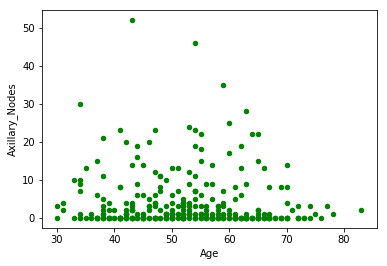

In [23]:
#### Scatter plot b/w Age and Axillary Nodes
haberman.plot (kind="scatter", x="Age", y="Axillary_Nodes", c="g")
plt.show()

Observation : Most of Nodes are sitting at 0 value

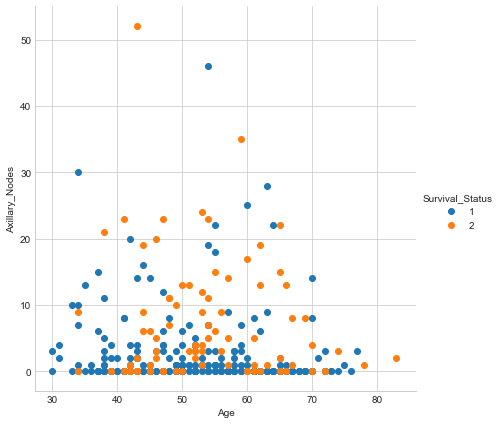

In [25]:
# Scatter Plot using Seaborn (sns) .. gives more visibility
sns.set_style("whitegrid")
sns.FacetGrid(data=haberman, hue="Survival_Status", size=6).map(plt.scatter, "Age", "Axillary_Nodes").add_legend()
plt.show()

Observation:
    1. Facetgrid is a class in Seaborn, hue should be output class, whitegrid enables grid, 
    2. Majorit of the class_1 (survived) are having less than 2 Nodes (mostly 0).
    3. But class_1 is not separated from class_2, so cannot come to conclusion

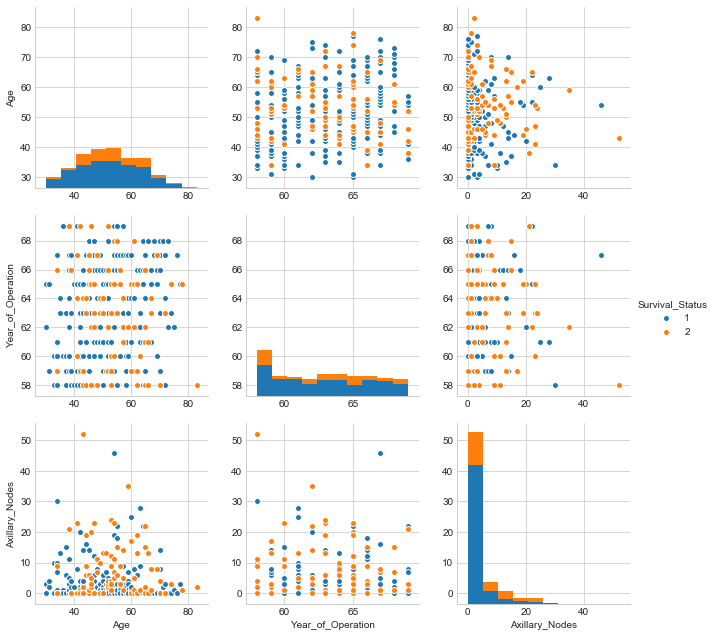

In [27]:
# Checking my luck with Pair Plot as there are only 3 features/dimensions
# Close plt object as it stores data of Facetgrid scatter plot
plt.close()
sns.pairplot(data=haberman, hue="Survival_Status", vars=["Age", "Year_of_Operation", "Axillary_Nodes"], size=3)
sns.set_style("whitegrid")
plt.show()

Observation:
    1. None of the above plot explains much. (As we have already seen from individual scatter plots)

# Lets go with univariate Analysis Like PDF, CDF etc.
sns.distplot is used to plot PDF

In [36]:
# Creating a method to reuse for plotting PDF b/w multiple input features and output feature
def pdf_plot(input_feature, output_feature):
    ''' Method that plots PDF between input_feature and output_feature'''
    sns.set_style(style="whitegrid")
    sns.FacetGrid(data=haberman, hue=output_feature, size=5).map(sns.distplot, input_feature).add_legend()

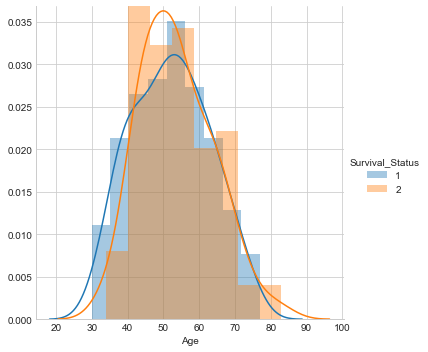

In [37]:
# PDF b/x Age and Survival_status
output_feature = "Survival_Status"
pdf_plot("Age", output_feature)
plt.show()

Observation:
    1. Both Survived and unsurvived are having almost similar distribution of age
    2. Unsurvived follows Gaussian/Normal Distribution with slight flat b/w 80 to 90

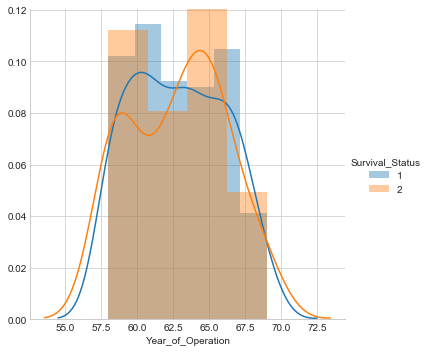

In [38]:
# PDF b/w Year_Of_Operation and Survival_status
pdf_plot("Year_of_Operation", output_feature)
plt.show()

observation:
    1. Again both the classes are distributed in same area. Nothing much informative.

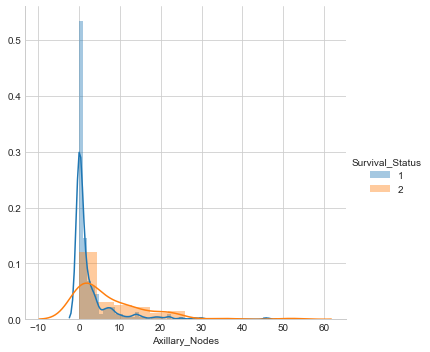

In [39]:
# PDF b/w Axillary_Nodes and Survival_Status
pdf_plot("Axillary_Nodes", output_feature)
plt.show()

Observation: 
    1. Class_1 is a kind of Lognormal distribution. Most of the survived patients are having 0 or less than 2 nodes
    2. More Axillary_Nodes lead to more chance of Unsurvival

# CDF 
    # Calculate CDF for Survived (Class_1)

In [40]:
# Segregate data into class_1 (survived) and class_2 (un_survived)
survived = haberman.loc[haberman['Survival_Status']==1]
un_survived = haberman.loc[haberman['Survival_Status']==2]
# Calculate counts and bin_edges 
# To Construct hist, the first step is to bin, i.e. divide entire range of values into a series of intervals, (here 10 intervals)
# Count gives how many values fall into each interval
counts, bin_edges = np.histogram(survived["Axillary_Nodes"], bins=10, density=True)

In [43]:
print (counts, bin_edges)
# This is not useful .. just printing here 

[ 0.18148292  0.01746894  0.00485248  0.00582298  0.00388199  0.0009705
  0.00194099  0.          0.          0.0009705 ] [  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]


In [44]:
pdf = counts/(sum(counts))
print (pdf)
print (bin_edges)

[ 0.83482143  0.08035714  0.02232143  0.02678571  0.01785714  0.00446429
  0.00892857  0.          0.          0.00446429]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]


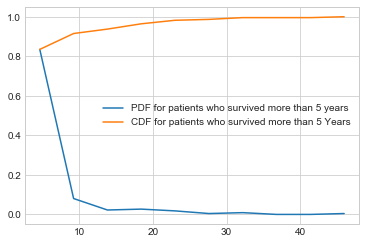

In [45]:
# From above numbers we can conclude that 83% of class_1 (survived) patients ar under 4.6 (having 4.6 ~= 5 Axillary nodes)
cdf = np.cumsum(pdf)
# numpy.cumsum (Cumulative sum) gives CDF
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
# Plotting multiple plots in same figure
plt.legend(["PDF for patients who survived more than 5 years",
            "CDF for patients who survived more than 5 Years"])
plt.show()

Observation:
    1. From above CDF we can say that almost 90% are having less than 10 Axillary Nodes

# CDF
    # Claculate CDF for Un_survived (class_2)

[ 0.39506173  0.17283951  0.0617284   0.08641975  0.04938272  0.08641975
  0.01234568  0.03703704  0.0617284   0.01234568  0.          0.          0.
  0.01234568  0.          0.          0.          0.          0.
  0.01234568]
[  0.    2.6   5.2   7.8  10.4  13.   15.6  18.2  20.8  23.4  26.   28.6
  31.2  33.8  36.4  39.   41.6  44.2  46.8  49.4  52. ]


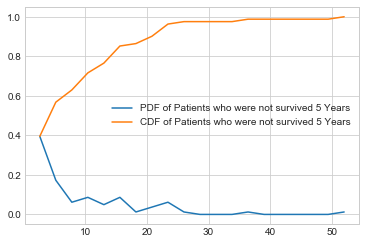

In [51]:
counts_unsurvived, bin_edges_us = np.histogram(un_survived["Axillary_Nodes"], bins=20, density=True)
pdf_us = counts_unsurvived / (sum(counts_unsurvived))
print (pdf_us)
print (bin_edges_us)
cdf_us = np.cumsum(pdf_us)
plt.plot(bin_edges_us[1:], pdf_us)
plt.plot(bin_edges_us[1:], cdf_us)
plt.legend(["PDF of Patients who were not survived 5 Years", "CDF of Patients who were not survived 5 Years"])
plt.show()

Observation:
    1. 39% of patients are having Nodes less than 2.6 (approxmately 3)
    2. 45% of patients are having node in the range of 2.6 (approx 3) to 13

# Let us look into some interesting statictics like Mean, Std-dev, quantiles etc.


In [53]:
# Statistics of Survived 
survived.describe()

,Age,Year_of_Operation,Axillary_Nodes,Survival_Status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [54]:
# Statistics of UnSurvived 
un_survived.describe()

,Age,Year_of_Operation,Axillary_Nodes,Survival_Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


Observations :
    1. For both survived & unsurvived age, year are having similar statictis (mean, std-dev)
    2. But for Axillary_Nodes 
           i. Survived are more centric at 2 (Less nodes, more chance of survival with in 5 years)
           ii. unsurvived are more centric at 7 (means more Nodes, more chance of unsurvival in 5 years)

# Median, Percentile, Quantile, IQR (Inter Quartile range), MAD (Median Absolute Deviation)

In [60]:
print ("Survived Median:")
print (np.median(survived['Axillary_Nodes']))
print ("Unsurvived Median :")
print (np.median(un_survived['Axillary_Nodes']))

print ("\nStandard Deviation:")
print (np.std(survived["Axillary_Nodes"]))
print (np.std(un_survived["Axillary_Nodes"]))
print ("\nQuantiles:")
print (np.percentile(survived['Axillary_Nodes'], np.arange(0, 100, 25)))
print (np.percentile(un_survived['Axillary_Nodes'], np.arange(0, 100, 25)))
print ("\n90 Percentile:")
print (np.percentile(survived['Axillary_Nodes'], 90))
print (np.percentile(un_survived['Axillary_Nodes'], 90))

# import mad from statsmodels.robust
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print (robust.mad(survived["Axillary_Nodes"]))
print (robust.mad(un_survived["Axillary_Nodes"]))

Survived Median:
0.0
Unsurvived Median :
4.0

Standard Deviation:
5.869092706952767
9.128776076761632

Quantiles:
[ 0.  0.  0.  3.]
[  0.   1.   4.  11.]

90 Percentile:
8.0
20.0

Median Absolute Deviation
0.0
5.93040887402


# Box Plots & Whiskers 

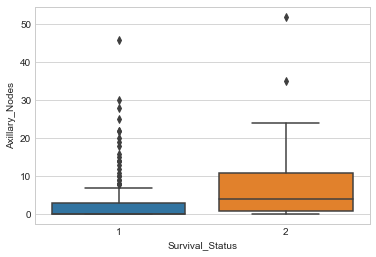

In [61]:
# Box plot takes a less space and visually represents the five number summary of the data points in a box. 
# The outliers are displayed as points outside the box.
# 1. Q1 - 1.5*IQR
# 2. Q1 (25th percentile)
# 3. Q2 (50th percentile or median)
# 4. Q3 (75th percentile)
# 5. Q3 + 1.5*IQR
# Inter Quartile Range = Q3 -Q1

sns.boxplot(data=haberman, x="Survival_Status", y="Axillary_Nodes")
plt.show()

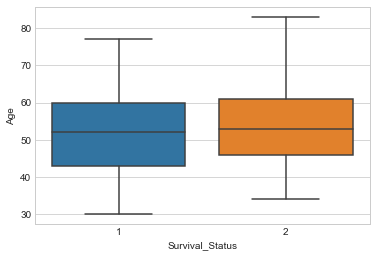

In [62]:
sns.boxplot(data=haberman, x="Survival_Status", y="Age")
plt.show()

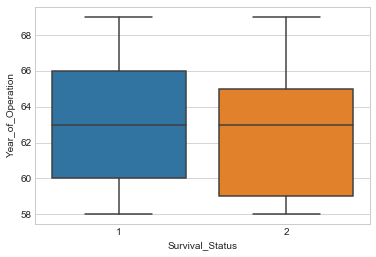

In [63]:
sns.boxplot(data=haberman, x="Survival_Status", y="Year_of_Operation")
plt.show()

# Violin Plots 
    # Violin plots are combination of Box Plots and PDF (Probability Density Funstion)
    # Dense regions are fatter and sparser regions are thinner 

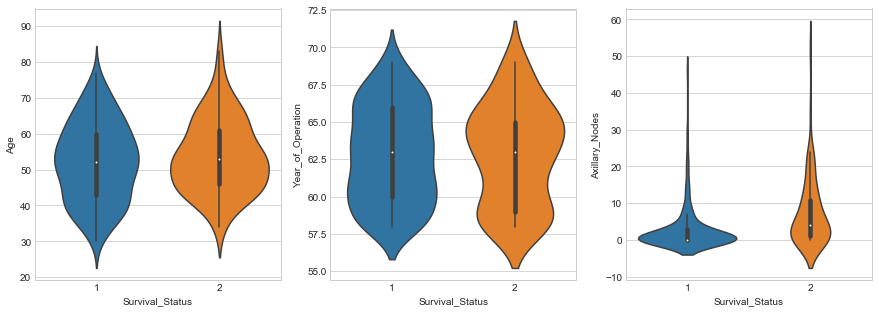

In [72]:
# plotting subplots in same line 
fig, axes = plt.subplots(1, 3, figsize=(15,5))
# fig = matplotlib object, axes = axes object or array of axes objects
for num, feature in enumerate(list(haberman.columns)[:-1]):
    sns.violinplot(x="Survival_Status", y=feature, data=haberman, ax=axes[num])
plt.show()

# Contour Plot
    # jointplot in seaborn

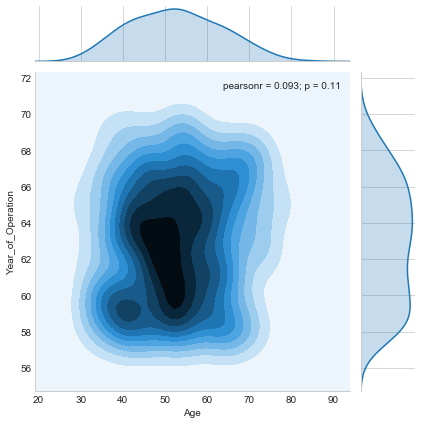

In [77]:
sns.jointplot(x="Age", y="Year_of_Operation", data=haberman, kind="kde")
plt.show()

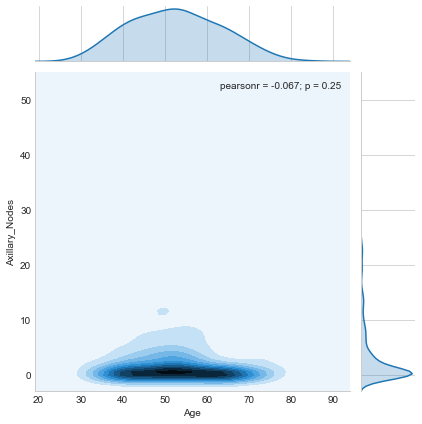

In [78]:
sns.jointplot(x="Age", y="Axillary_Nodes", data=haberman, kind="kde")
plt.show()

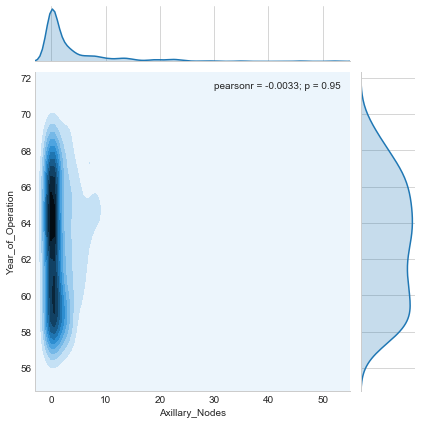

In [79]:
sns.jointplot(x="Axillary_Nodes", y="Year_of_Operation", data=haberman, kind="kde")
plt.show()